In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

Importing Historical data of 6 stocks of my portfolio. Source = Yahoo Finance


1.   COALINDIA.NS
2.   ONGC.NS
3.   BPCL.NS
4.   IDEA.NS
5.   ASHOKLEY.NS
6.   FEDERALBNK.NS





In [10]:
!pip install yfinance
import yfinance as yf

# Fetch data using yfinance
tickers = ['COALINDIA.NS', 'ONGC.NS', 'BPCL.NS', 'IDEA.NS', 'ASHOKLEY.NS', 'FEDERALBNK.NS']
data = yf.download(tickers, start='2000-01-01', end='2023-06-30')

# Display the first few rows of the data
data.head()

[*********************100%%**********************]  6 of 6 completed


Price        Adj Close                                                         \
Ticker     ASHOKLEY.NS   BPCL.NS COALINDIA.NS FEDERALBNK.NS IDEA.NS   ONGC.NS   
Date                                                                            
2000-01-03         NaN  5.805503          NaN      0.859269     NaN  7.397904   
2000-01-04         NaN  5.387448          NaN      0.839597     NaN  7.158758   
2000-01-05         NaN  5.234041          NaN      0.775860     NaN  7.732356   
2000-01-06         NaN  5.529950          NaN      0.799466     NaN  7.600657   
2000-01-07         NaN  5.523406          NaN      0.780581     NaN  7.477620   

Price            Close                                        ...  \
Ticker     ASHOKLEY.NS    BPCL.NS COALINDIA.NS FEDERALBNK.NS  ...   
Date                                                          ...   
2000-01-03         NaN  16.635416          NaN      1.393014  ...   
2000-01-04         NaN  15.437500          NaN      1.361123  ...   
2000-01-05         NaN  14.997916          NaN      1.257795  ...   
2000-01-06         NaN  15.845833          NaN      1.296064  ...   
2000-01-07         NaN  15.827083          NaN      1.265449  ...   

Price              Open                                       Volume  \
Ticker     COALINDIA.NS FEDERALBNK.NS IDEA.NS    ONGC.NS ASHOKLEY.NS   
Date                                                                   
2000-01-03          NaN      1.352193     NaN  22.777777         NaN   
2000-01-04          NaN      1.447867     NaN  22.388887         NaN   
2000-01-05          NaN      1.341988     NaN  22.333332         NaN   
2000-01-06          NaN      1.257795     NaN  26.000000         NaN   
2000-01-07          NaN      1.265449     NaN  24.777777         NaN   

Price                                                               
Ticker        BPCL.NS COALINDIA.NS FEDERALBNK.NS IDEA.NS   ONGC.NS  
Date                                                                
2000-01-03   209280.0          NaN     3178760.0     NaN   86400.0  
2000-01-04   547680.0          NaN     3651616.0     NaN  161100.0  
2000-01-05  3660912.0          NaN     2248061.0     NaN  243000.0  
2000-01-06  1429296.0          NaN     1728563.0     NaN  320400.0  
2000-01-07  1036488.0          NaN     1188762.0     NaN  102600.0  

[5 rows x 36 columns]

In [11]:
last_trade_price = data['Adj Close']
last_trade_price.head()

Ticker,ASHOKLEY.NS,BPCL.NS,COALINDIA.NS,FEDERALBNK.NS,IDEA.NS,ONGC.NS
Date,,,,,,
2000-01-03,NaN,5.805503,NaN,0.859269,NaN,7.397904
2000-01-04,NaN,5.387448,NaN,0.839597,NaN,7.158758
2000-01-05,NaN,5.234041,NaN,0.775860,NaN,7.732356
2000-01-06,NaN,5.529950,NaN,0.799466,NaN,7.600657
2000-01-07,NaN,5.523406,NaN,0.780581,NaN,7.477620


In [12]:
returns = last_trade_price.pct_change()
returns.head()

<ipython-input-12-9028bc02a98c>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = last_trade_price.pct_change()


Ticker,ASHOKLEY.NS,BPCL.NS,COALINDIA.NS,FEDERALBNK.NS,IDEA.NS,ONGC.NS
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,-0.072010,NaN,-0.022894,NaN,-0.032326
2000-01-05,NaN,-0.028475,NaN,-0.075914,NaN,0.080125
2000-01-06,NaN,0.056535,NaN,0.030426,NaN,-0.017032
2000-01-07,NaN,-0.001183,NaN,-0.023622,NaN,-0.016188


In [13]:
mean_returns = returns.mean()
mean_returns

,0
Ticker,
ASHOKLEY.NS,0.001429
BPCL.NS,0.001609
COALINDIA.NS,0.000327
FEDERALBNK.NS,0.001192
IDEA.NS,0.000193
ONGC.NS,0.000805


To Annualize mean returns we need to multiply by 250 since there are approx. 250 trading days in a year.

In [14]:
annualized_mean_returns = mean_returns*250
annualized_mean_returns

,0
Ticker,
ASHOKLEY.NS,0.357241
BPCL.NS,0.402163
COALINDIA.NS,0.081702
FEDERALBNK.NS,0.298090
IDEA.NS,0.048158
ONGC.NS,0.201278


In [15]:
risk = returns.std()
risk

,0
Ticker,
ASHOKLEY.NS,0.030308
BPCL.NS,0.070954
COALINDIA.NS,0.018487
FEDERALBNK.NS,0.026487
IDEA.NS,0.036872
ONGC.NS,0.024272


In [16]:
covariance_matrix = returns.cov()
covariance_matrix

Ticker,ASHOKLEY.NS,BPCL.NS,COALINDIA.NS,FEDERALBNK.NS,IDEA.NS,ONGC.NS
Ticker,,,,,,
ASHOKLEY.NS,0.000919,0.000176,0.000135,0.000270,0.000216,0.000175
BPCL.NS,0.000176,0.005035,0.000123,0.000168,0.000163,0.000682
COALINDIA.NS,0.000135,0.000123,0.000342,0.000131,0.000112,0.000154
FEDERALBNK.NS,0.000270,0.000168,0.000131,0.000702,0.000213,0.000185
IDEA.NS,0.000216,0.000163,0.000112,0.000213,0.001360,0.000145
ONGC.NS,0.000175,0.000682,0.000154,0.000185,0.000145,0.000589


Annualize risk


In [17]:
annualized_risk = risk*np.sqrt(250)
annualized_risk

,0
Ticker,
ASHOKLEY.NS,0.479212
BPCL.NS,1.121887
COALINDIA.NS,0.292310
FEDERALBNK.NS,0.418794
IDEA.NS,0.583001
ONGC.NS,0.383770


Now, for optimization I'll have to plot Morkovitz bulllet i.e minimum variance line. fuction for the minimum varaince line is bit long so analysts prefer Monte Carlo simulation, we'll take 50000 random weights portfolio and plot Risk vs Return as a scatter plot

In [18]:
num_portfolios = 1000000
final = np.zeros((num_portfolios, 9))
rf = 0.035
for i in range(num_portfolios):
  weights = np.random.random(6)
  weights = weights/np.sum(weights)
  portfolio_ret = np.dot(weights, mean_returns)*250
  portfolio_risk = np.sqrt(np.dot(weights, np.dot(covariance_matrix, weights.T)))*np.sqrt(250)
  final[i,0] = portfolio_ret
  final[i,1] = portfolio_risk
  final[i,2] = portfolio_ret - rf / portfolio_risk
  for j in range(6):
    final[i, j+3] = weights[j]



In [19]:
main = pd.DataFrame(data = final , columns = ['returns', 'volatility', 'sharpe ratio' , 'Coal india', 'ongc', 'bpcl', 'idea', 'ashok leyland', 'fedral bank'])
main.head()

,returns,volatility,sharpe ratio,Coal india,ongc,bpcl,idea,ashok leyland,fedral bank
0,0.214304,0.381714,0.122612,0.058011,0.226153,0.103943,0.163975,0.293223,0.154695
1,0.230512,0.323537,0.122333,0.172369,0.169500,0.179649,0.163570,0.170146,0.144766
2,0.306363,0.376307,0.213354,0.202137,0.219685,0.050395,0.379310,0.008282,0.140191
3,0.199569,0.404984,0.113145,0.018515,0.299727,0.497516,0.053538,0.068571,0.062133
4,0.225079,0.275658,0.098110,0.259366,0.033180,0.222515,0.251782,0.137697,0.095460


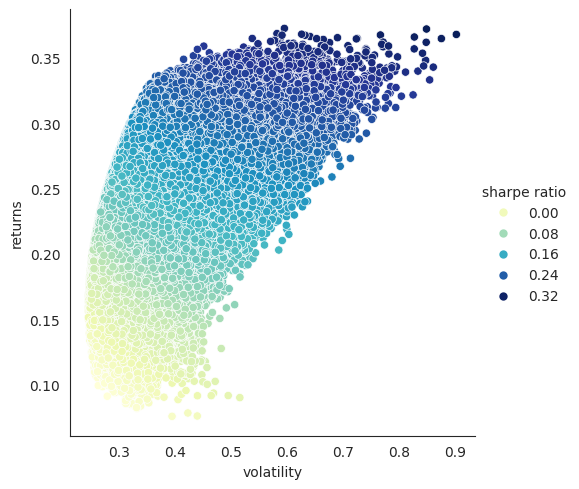

In [20]:
sns.set_style('white')
sns.set_palette("Paired")
sns.relplot(x = 'volatility', y='returns', data= main, kind= 'scatter',hue= 'sharpe ratio', palette="YlGnBu");

In [21]:
min_variance_portfolio = main.iloc[main['volatility'].idxmin()]
min_variance_portfolio

,970870
returns,0.151444
volatility,0.245547
sharpe ratio,0.008904
Coal india,0.085695
ongc,0.006105
bpcl,0.510020
idea,0.122391
ashok leyland,0.099847
fedral bank,0.175942


In [22]:
max_sharpe_portfolio = main.iloc[main['sharpe ratio'].idxmax()]
max_sharpe_portfolio

,232868
returns,0.372189
volatility,0.848849
sharpe ratio,0.330957
Coal india,0.142966
ongc,0.740788
bpcl,0.000563
idea,0.053081
ashok leyland,0.034422
fedral bank,0.028180


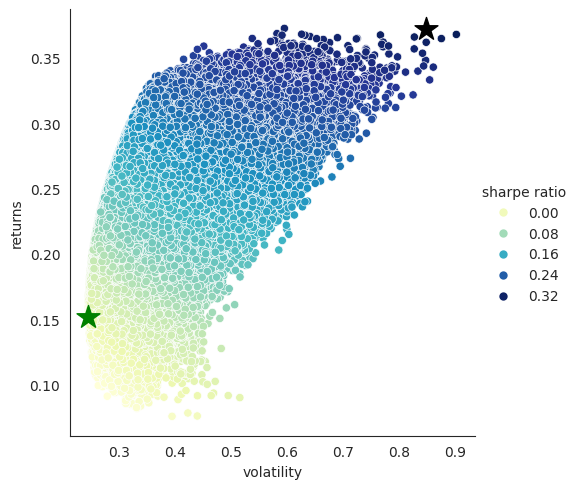

In [23]:
sns.set_style('white')
sns.set_palette("Paired")
sns.relplot(x = 'volatility', y='returns', data= main, kind= 'scatter',hue= 'sharpe ratio', palette="YlGnBu")
plt.scatter(min_variance_portfolio.volatility, min_variance_portfolio.returns, marker= "*", c= 'g', s=300)
plt.scatter(max_sharpe_portfolio.volatility, max_sharpe_portfolio.returns, marker = "*", c= 'black', s= 300)
plt.show()

Utility Function

$U = E(R) - 0.5 * A * \sigma^2$

A is the coefficient of risk aversion, it varies from 0-10 for risk averse investors and is negative for risk taking investors. Here I assume the investors are risk averse

Capital Market Line

$ E(R_p) = R_f + ((E(R_i) - R_f)/\sigma_i)*\sigma_p $

**Why are calculating the weights by optimization and not giving equal weightage to every stock?**

Portfolio with equal weights


In [24]:
# weights = np.array([0.2 ,0.2, 0.2, 0.2, 0.2])

In [27]:
# Ensure weights has the same length as annualized_mean_returns
weights = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.25])

exp_return = np.dot(weights, annualized_mean_returns)
exp_return

0.22842258869519716

In [28]:
variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
risk_of_equal_portfolio = np.sqrt(variance)
risk_of_equal_portfolio

0.02005606342213972

Clearly the risk involved here is less than any indivisual risk, this not always the case but this surely shows diversification reduced risk but the optimum risky portfolio is determined by the sharpe's ratio not by giving equal weights and showing equal diversification since optimum risky portfolio has more returns and risk is already adjusted for rational investor by CAPM

**How did you choose the stocks?**

for selecting stocks I looked for top performers in the last decade and I have aready done equity research on paint industry and found berge and asian paints as market leader having highest profit margin. For more diversification I took stocks from different industries and BIOCON especially as pharma indurty is going to grow in the coming time in my opinion.

**What is the impact of increasing the number of stocks in the portfolio?**

More diversification reduces the risk of any portfolio hence increasing the no. of stocks is a good option but by increasing the no. of stocks we should also raise our investment funds. The rationale behind this technique is that a portfolio constructed of different kinds of assets will, on average, yield higher long-term returns and lower the risk of any individual holding or security. Positive response of one can neutralize negative of other hence smooth outs unsystematic risk

**Which optimization techniques are used by Mutual Funds currently?**


Clearly the mean- variance optimization technique is a great way to practice mutual funds optimizations but should use more contraints as MVO( mean variance optimization ) only considers risk, return and correlations of assets but rather we should add more contraints such as common sense constraints, only long position contraints etc to make our model efficient since assets which have performed good in past can become the worst decision for an investor in future.

**As far as Mutual funds are concerned I don't think they reveal their techniques for optimization but I assume its majorly based on managers experience and expertise and less of maths and any technical stuff involved in it.**

**Which parameters are you using to check the accuracy of your model?**


In [31]:
# data2 = web.DataReader(['COALINDIA.NS', 'ONGC.NS', 'BPCL.NS', 'IDEA.NS', 'ASHOKLEY.NS', 'FEDERALBNK.NS'], 'yahoo', start='2019-01-01', end= '2020-01-01')
# data2.head()

# !pip install yfinance
import yfinance as yf

tickers = ['COALINDIA.NS', 'ONGC.NS', 'BPCL.NS', 'IDEA.NS', 'ASHOKLEY.NS', 'FEDERALBNK.NS']
data2 = yf.download(tickers, start='2019-01-01', end='2023-06-30')
data2.head()

[*********************100%%**********************]  6 of 6 completed


Price        Adj Close                                                    \
Ticker     ASHOKLEY.NS     BPCL.NS COALINDIA.NS FEDERALBNK.NS    IDEA.NS   
Date                                                                       
2019-01-01   87.169891  121.127647   146.120010     88.266037  22.762079   
2019-01-02   85.001282  118.076385   143.215744     89.974411  22.159111   
2019-01-03   83.470490  116.278610   142.187134     87.316933  21.767181   
2019-01-04   82.322388  118.571190   143.094742     89.974411  21.827478   
2019-01-07   79.473427  117.284706   141.884644     89.784584  22.098814   

Price                        Close                                         \
Ticker         ONGC.NS ASHOKLEY.NS     BPCL.NS COALINDIA.NS FEDERALBNK.NS   
Date                                                                        
2019-01-01  104.363129  102.500000  183.600006   241.500000     93.000000   
2019-01-02  103.344093   99.949997  178.975006   236.699997     94.800003   
2019-01-03  100.076149   98.150002  176.250000   235.000000     92.000000   
2019-01-04  102.395309   96.800003  179.725006   236.500000     94.800003   
2019-01-07  103.906311   93.449997  177.774994   234.500000     94.599998   

Price       ...         Open                                           Volume  \
Ticker      ... COALINDIA.NS FEDERALBNK.NS    IDEA.NS     ONGC.NS ASHOKLEY.NS   
Date        ...                                                                 
2019-01-01  ...   241.000000     93.750000  22.912823  150.000000    13384173   
2019-01-02  ...   240.899994     93.199997  22.882673  148.000000    40123864   
2019-01-03  ...   238.699997     95.300003  21.556143  145.000000    24374807   
2019-01-04  ...   234.100006     93.250000  21.767181  142.050003    24533568   
2019-01-07  ...   238.000000     95.250000  22.068666  147.550003    34348346   

Price                                                                
Ticker       BPCL.NS COALINDIA.NS FEDERALBNK.NS   IDEA.NS   ONGC.NS  
Date                                                                 
2019-01-01   3105422      2227003       6000894  14601474   4496586  
2019-01-02  19725590      3897893      18353855  17611505  17436694  
2019-01-03   9972260      5664136      12573160  39317592  26599483  
2019-01-04   7717220      2885669      13600522  21164742   7395898  
2019-01-07   5790820      7347326       6098289  13701909  12700566  

[5 rows x 36 columns]

In [37]:
# weights_max_sharpe = [max_sharpe_portfolio.TCS , max_sharpe_portfolio.HINDZINC, max_sharpe_portfolio.ASIANPAINT, max_sharpe_portfolio.BIOCON, max_sharpe_portfolio.BERGEPAINT]
# acc_idv_returns =  data2['Adj Close'].pct_change().mean() * 250
# port_ret = np.dot(acc_idv_returns, weights_max_sharpe)
# port_ret

weights_max_sharpe = [max_sharpe_portfolio.iloc[0] , max_sharpe_portfolio.iloc[1], max_sharpe_portfolio.iloc[2], max_sharpe_portfolio.iloc[3], max_sharpe_portfolio.iloc[4], max_sharpe_portfolio.iloc[5]]
acc_idv_returns =  data2['Adj Close'].pct_change().mean() * 250
port_ret = np.dot(acc_idv_returns, weights_max_sharpe)
port_ret

0.3485360324419628

In [38]:
port_std = np.dot(weights_max_sharpe , np.dot(data2['Adj Close'].pct_change().cov()*np.sqrt(250), weights.T))
port_std

0.015214706023740292